<a href="https://colab.research.google.com/github/andreaeddyricci/Webinar-Attendance-Capstone/blob/main/Preprocessing_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor

In [4]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=e2ff05ffb98e475963193c5a0a2def89db46b53cc59e0242ba914483df03d50e
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [5]:
import eli5

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
path = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/dataset_to_model.csv'
df = pd.read_csv(path, index_col='Unnamed: 0')

In [9]:
df.columns

Index(['City', 'State/Province', 'Industry', 'Questions & Comments',
       'Country/Region Name', 'Source Name', 'webinar_name',
       'Job Title Category', 'Number_of_Logins', 'Registered_Webinars',
       'Attended_Webinars', 'Attended_Percent', 'Time_in_session_percent',
       'night_time'],
      dtype='object')

In [10]:
df.head()

,City,State/Province,Industry,Questions & Comments,Country/Region Name,Source Name,webinar_name,Job Title Category,Number_of_Logins,Registered_Webinars,Attended_Webinars,Attended_Percent,Time_in_session_percent,night_time
0,Pune,Other,Software - Other,0,India,mailchimp,3D Metal,Other,0.0,3,1,0.333333,0.0,0
1,Pune,Other,Other,0,India,mailchimp,Biomaterials,Other,0.0,3,1,0.333333,0.0,0
2,bazpur,Other,Education,0,India,mailchimp,Indian Ecosystem,None,5.0,3,1,0.333333,1.0,0
3,Kayseri,Other,High Tech - Other,0,Turkey,linkedin,Biomaterials,Academic,0.0,1,0,0.000000,0.0,0
4,Nairobi,Other,High Tech - Other,0,Kenya,website,Preprocessing,C-Suite,0.0,1,0,0.000000,0.0,0


#Correlations

In [11]:
df.dtypes

City                        object
State/Province              object
Industry                    object
Questions & Comments         int64
Country/Region Name         object
Source Name                 object
webinar_name                object
Job Title Category          object
Number_of_Logins           float64
Registered_Webinars          int64
Attended_Webinars            int64
Attended_Percent           float64
Time_in_session_percent    float64
night_time                   int64
dtype: object

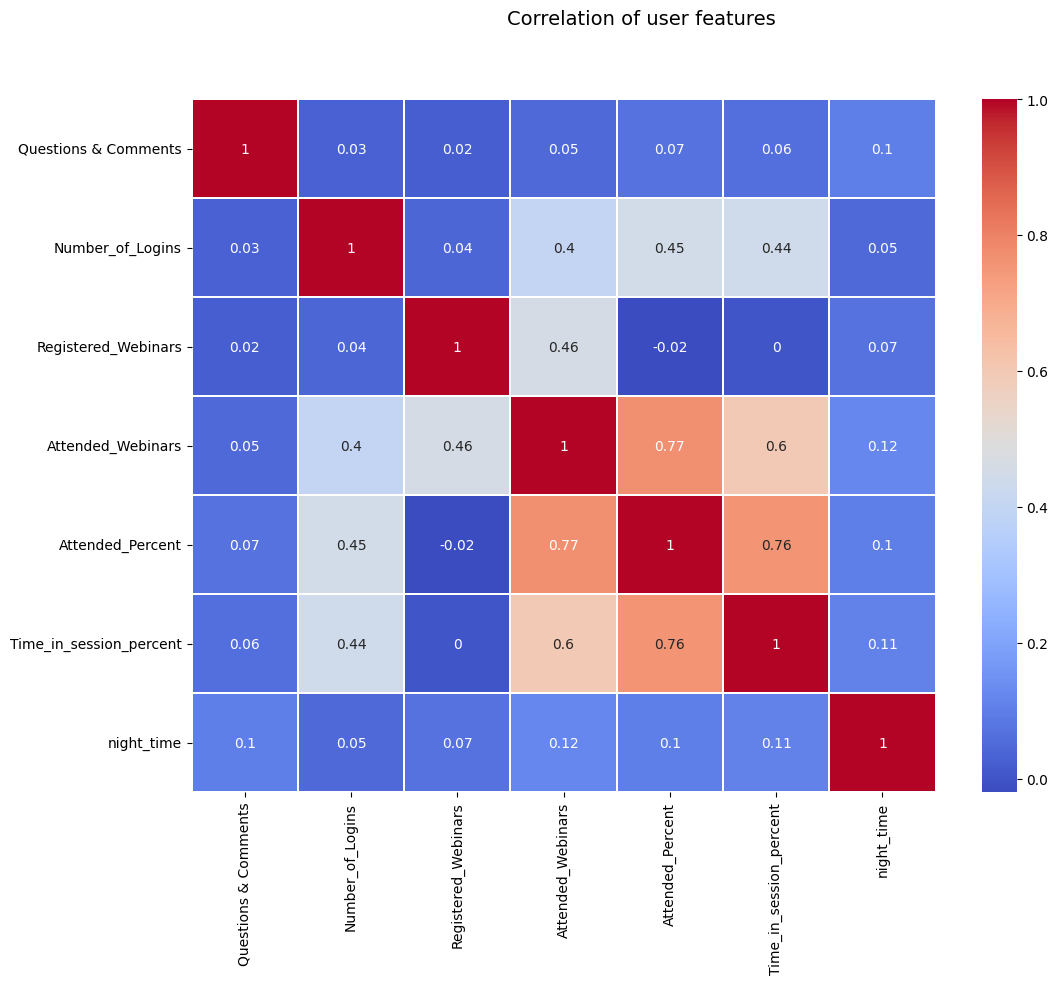

In [12]:
# Check all correlations:
corr_map = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corr_map,2), annot=True, cmap="coolwarm",
                 linewidths=.05)
t= fig.suptitle('Correlation of user features', fontsize=14)

#One Hot Encoding

In [13]:
#Create dummy or indicator features for categorical variables
dummy_df = pd.get_dummies(df[['City', 'State/Province','Industry', 
                              'Country/Region Name', 'Source Name', 
                              'webinar_name', 'Job Title Category']], drop_first = True)
df_combined = pd.concat([df, dummy_df], axis=1) #combine the dfs
df_combined.drop(['City', 'State/Province', 
          'Industry', 'Country/Region Name', 'Source Name',
          'webinar_name', 'Job Title Category'], axis=1, inplace=True) #remove the original columns

# Cross Validating and Training

inspiration: https://www.kaggle.com/code/junkal/selecting-the-best-regression-model#Picking-out-the-relevant-attributes-for-regression-modelling

Our goal is to predict what percent of a webinar a person will attend.

In [14]:
cols = df_combined.columns

In [15]:
# The target variable (y) is time spent in a session (percent)
# All other columns are the features (X)
X = df_combined[cols].drop('Time_in_session_percent',axis=1)
y = df_combined['Time_in_session_percent']

In [16]:
# Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [17]:
#scaler = StandardScaler()
#y_train = scaler.fit_transform(y_train.values.reshape(1, -1))

In [18]:
# checking common regression models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledTREE', Pipeline([('Scaler', StandardScaler()),('TREE', DecisionTreeRegressor())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
pipelines.append(('ScaledSGD', Pipeline([('Scaler', StandardScaler()),('SGD', SGDRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledBR', Pipeline([('Scaler', StandardScaler()),('BR', BayesianRidge())])))
pipelines.append(('ScaledKR', Pipeline([('Scaler', StandardScaler()),('KR', KernelRidge())])))
pipelines.append(('ScaledXGBOOST', Pipeline([('Scaler', StandardScaler()),('XGBoost', XGBRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -1976053143654308356051435520.000000 (550227429127028657918836736.000000)
ScaledLASSO: -0.154343 (0.009782)
ScaledEN: -0.154343 (0.009782)
ScaledKNN: -0.132609 (0.009401)
ScaledTREE: -0.083471 (0.015810)
ScaledGB: -0.047670 (0.008362)
ScaledSGD: -0.098128 (0.009957)
ScaledSVR: -0.089689 (0.009072)
ScaledBR: -0.086148 (0.005956)
ScaledKR: -0.214631 (0.034284)
ScaledXGBOOST: -0.051702 (0.008274)


In [19]:
# Root Mean Squared Error
rmse=[]
for i in results:
  rmse.append(np.sqrt(-np.mean(i)))

In [20]:
rmse_df = pd.DataFrame(data = [names, rmse]).T
rmse_df = rmse_df.rename(columns={0:'model_name', 1:'RMSE'})
rmse_df.sort_values('RMSE')

,model_name,RMSE
5,ScaledGB,0.218335
10,ScaledXGBOOST,0.22738
4,ScaledTREE,0.288913
8,ScaledBR,0.293509
7,ScaledSVR,0.299481
6,ScaledSGD,0.313254
3,ScaledKNN,0.364155
1,ScaledLASSO,0.392866
2,ScaledEN,0.392866
9,ScaledKR,0.463283


We will dive deeper into the top 6 models and see which has the greatest predictive power (lowest root mean squared error).

I will be training and testing Gradient Boosting (GB), BayesianRidge (BR) and Stochastic Gradient Descent (SGD).

#Scoring Function

more info about scoring for regression: https://scikit-learn.org/stable/modules/model_evaluation.html

https://theprofessionalspoint.blogspot.com/2019/02/loss-functions-in-machine-learning-mae.html

In [21]:
def find_scores(y_test, y_pred):
  meanAbsoluteError = mean_absolute_error(y_test, y_pred)
  meanSquaredError = mean_squared_error(y_test, y_pred)
  return np.sqrt(meanSquaredError) #rootMeanSquaredError

def print_scores(y_test, y_pred):
  meanAbsoluteError = mean_absolute_error(y_test, y_pred)
  meanSquaredError = mean_squared_error(y_test, y_pred)
  rootMeanSquaredError = np.sqrt(meanSquaredError)

  print('Mean Absolute Error:', meanAbsoluteError)  
  print('Mean Squared Error:', meanSquaredError)  
  print('Root Mean Squared Error:', rootMeanSquaredError)

#Scaling

In [22]:
#Scale the features that are not between 0 and 1
scaler = StandardScaler()
X_train[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']] = scaler.fit_transform(X_train[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']].values)
X_test[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']] = scaler.fit_transform(X_test[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']].values)


#Gradient Boosting

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [23]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)

GB_RMSE = find_scores(y_test, y_pred_GB)

print_scores(y_test, y_pred_GB)

Mean Absolute Error: 0.15262750951030127
Mean Squared Error: 0.062061112726073446
Root Mean Squared Error: 0.2491206790414506


##Hyperparameter Tuning

In [47]:
param_grid_GB = {
    "n_estimators": [2, 50, 500, 1000],
    "max_depth": [3, 10, 25],
    "min_samples_split": [2, 5, 10],
    "learning_rate": [0.001, 0.01, 0.1, 10]
}

GB_grid = RandomizedSearchCV(GradientBoostingRegressor(), param_grid_GB, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
GB_grid.fit(X_train, y_train)
print(GB_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan -0.2420856  -0.28764612 -0.24892061 -0.29027347 -0.22207953
 -0.39208207 -0.2277478  -0.28475133 -0.2848267 ]
  warnings.warn(


{'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 10, 'learning_rate': 0.1}


Now, I will rerun with the best parameters.

In [48]:
GB_tuned = GradientBoostingRegressor(**GB_grid.best_params_)
GB_tuned.fit(X_train, y_train)

y_pred_GB_tuned = GB_tuned.predict(X_test)

GB_tuned_RMSE = find_scores(y_test, y_pred_GB_tuned)

print_scores(y_test, y_pred_GB_tuned)

Mean Absolute Error: 0.14466502152701727
Mean Squared Error: 0.06121231715709328
Root Mean Squared Error: 0.24741123086289613


#Bayesian Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html

In [26]:
BR = BayesianRidge()
BR.fit(X_train, y_train)
y_pred_BR = BR.predict(X_test)

BR_RMSE = find_scores(y_test, y_pred_BR)

print_scores(y_test, y_pred_BR)

Mean Absolute Error: 0.1912589558515609
Mean Squared Error: 0.07214256934231147
Root Mean Squared Error: 0.26859368820266694


##Hyperparameter Tuning

In [27]:
param_grid_BR = {
    'n_iter': [5, 50, 500, 1000],
    'alpha_init':[1, 1.2, 1.5, 1.9],
    'lambda_init': [1e-1, 1e-3, 1e-5, 1e-9]
}

BR_grid = RandomizedSearchCV(BayesianRidge(), param_grid_BR, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
BR_grid.fit(X_train, y_train)
print(BR_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_iter': 500, 'lambda_init': 0.1, 'alpha_init': 1.5}


Now, I will rerun with the best parameters.

In [28]:
BR_tuned = BayesianRidge(**BR_grid.best_params_)
BR_tuned.fit(X_train, y_train)

y_pred_BR_tuned = BR_tuned.predict(X_test)

BR_tuned_RMSE = find_scores(y_test, y_pred_BR_tuned)

print_scores(y_test, y_pred_BR_tuned)

Mean Absolute Error: 0.191259005079672
Mean Squared Error: 0.07214261822768969
Root Mean Squared Error: 0.26859377920512173


#Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [29]:
SGD = SGDRegressor()
SGD.fit(X_train, y_train)
y_pred_SGD = SGD.predict(X_test)

SGD_RMSE = find_scores(y_test, y_pred_SGD)

print_scores(y_test, y_pred_SGD)

Mean Absolute Error: 0.19581852313412618
Mean Squared Error: 0.07012248135833016
Root Mean Squared Error: 0.2648064979533738


In [30]:
#What features are important?
eli5.show_weights(SGD, top=20, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.265,Attended_Percent
+0.152,Attended_Webinars
+0.091,<BIAS>
+0.054,Source Name_website
+0.048,webinar_name_Preprocessing
+0.047,Number_of_Logins
+0.042,"Industry_Medical, Pharma, Biotech"
+0.037,Country/Region Name_Germany
+0.030,Industry_Manufacturing
+0.029,"Job Title Category_Marketer, Salesperson"


##Hyperparameter Tuning

In [31]:
param_grid_SGD = {
    'max_iter': [5, 500, 5000, 10000],
    'alpha':[1e-06, 1e-04, 1e-02, 1],
    'epsilon': [1e-06, 1e-04, 1e-02, 1]
}

SGD_grid = RandomizedSearchCV(SGDRegressor(), param_grid_SGD, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
SGD_grid.fit(X_train, y_train)
print(SGD_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_iter': 5, 'epsilon': 1e-06, 'alpha': 0.01}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Now, I will rerun with the best parameters.

In [32]:
SGD_tuned = SGDRegressor(**SGD_grid.best_params_)
SGD_tuned.fit(X_train, y_train)

y_pred_SGD_tuned = SGD_tuned.predict(X_test)

SGD_tuned_RMSE = find_scores(y_test, y_pred_SGD_tuned)

print_scores(y_test, y_pred_SGD_tuned)

Mean Absolute Error: 0.19411518646486958
Mean Squared Error: 0.06818830171614068
Root Mean Squared Error: 0.26112889866144784


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [33]:
#What features are important?
eli5.show_weights(SGD_tuned, top=10, feature_names = X_train.columns.tolist())

#Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [34]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_RMSE = find_scores(y_test, y_pred_lasso)

print_scores(y_test, y_pred_lasso)


Mean Absolute Error: 0.3341314028153524
Mean Squared Error: 0.13970190884223097
Root Mean Squared Error: 0.3737671853470165


In [35]:
# What features are important?
eli5.show_weights(lasso, top=10, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.294,<BIAS>


##Hyperparameter Tuning

In [36]:
'''scores = []
for alpha in [0.001, 0.01, 1.0, 10.0, 20.0, 50.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))
print(scores)'''

'scores = []\nfor alpha in [0.001, 0.01, 1.0, 10.0, 20.0, 50.0]:\n  lasso = Lasso(alpha=alpha)\n  lasso.fit(X_train, y_train)\n  lasso_pred = lasso.predict(X_test)\n  scores.append(lasso.score(X_test, y_test))\nprint(scores)'

In [37]:
param_grid_lasso = {
    'max_iter': [5, 500, 5000, 10000],
    'alpha':[1e-06, 1e-04, 1e-02, 1],
}

lasso_grid = RandomizedSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_iter': 500, 'alpha': 0.01}


Now, I will rerun with the best parameters.

In [38]:
lasso_tuned = Lasso(**lasso_grid.best_params_)
lasso_tuned.fit(X_train, y_train)

y_pred_lasso_tuned = lasso_tuned.predict(X_test)

lasso_tuned_RMSE = find_scores(y_test, y_pred_lasso_tuned)

print_scores(y_test, y_pred_lasso_tuned)

Mean Absolute Error: 0.17973507877049374
Mean Squared Error: 0.07316910323153758
Root Mean Squared Error: 0.270497880271801


In [39]:
#What features are important?
eli5.show_weights(lasso_tuned, top=10, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.557,Attended_Percent
+0.051,<BIAS>
+0.036,Number_of_Logins
+0.008,Attended_Webinars
-0.016,State/Province_Other


# Comparison of Models

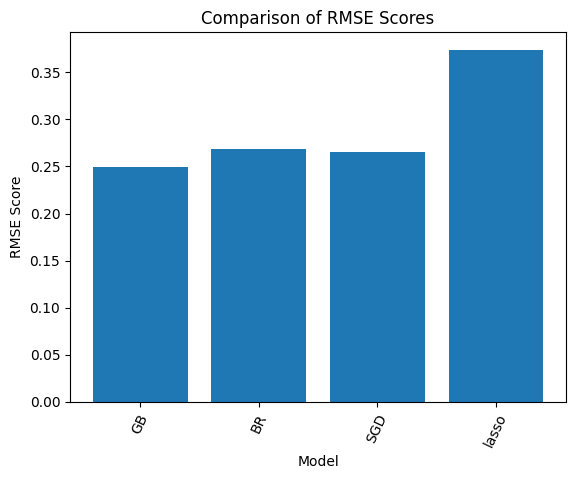

In [40]:
RMSE_scores = [GB_RMSE, BR_RMSE, SGD_RMSE, lasso_RMSE]
models = ["GB","BR","SGD",'lasso']

_ = plt.bar(models, RMSE_scores)
_ = plt.title("Comparison of RMSE Scores")
_ = plt.xlabel('Model')
_ = plt.ylabel('RMSE Score')
_ = plt.xticks(rotation = 65)

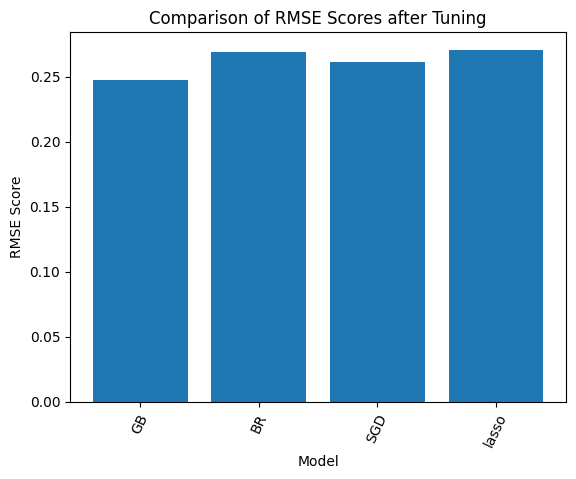

In [49]:
RMSE_tuned_scores = [GB_tuned_RMSE, BR_tuned_RMSE, SGD_tuned_RMSE, lasso_tuned_RMSE]
models = ["GB","BR","SGD",'lasso']

_ = plt.bar(models, RMSE_tuned_scores)
_ = plt.title("Comparison of RMSE Scores after Tuning")
_ = plt.xlabel('Model')
_ = plt.ylabel('RMSE Score')
_ = plt.xticks(rotation = 65)

In [50]:
rmse_df = pd.DataFrame(list(zip(models, RMSE_scores, RMSE_tuned_scores)),
               columns =['Model', 'RMSE Score','Tuned RMSE Score'])

rmse_df['Difference in Scores'] = rmse_df['Tuned RMSE Score'] - rmse_df['RMSE Score']

rmse_df['Difference in Scores'] = rmse_df['Difference in Scores'].round(decimals=4)

rmse_df

,Model,RMSE Score,Tuned RMSE Score,Difference in Scores
0,GB,0.249121,0.247411,-0.0017
1,BR,0.268594,0.268594,0.0000
2,SGD,0.264806,0.261129,-0.0037
3,lasso,0.373767,0.270498,-0.1033


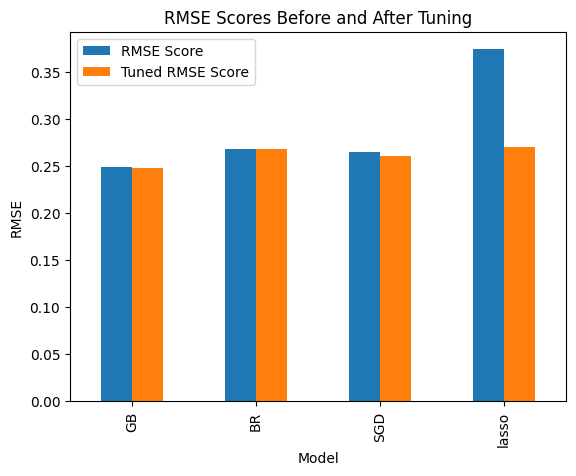

In [51]:
_ = rmse_df[['Model','RMSE Score','Tuned RMSE Score']].set_index('Model').plot(kind='bar')
_ = plt.title("RMSE Scores Before and After Tuning")
_ = plt.ylabel("RMSE")

##Comparison to Dummy Regressor

"The Dummy Regressor is a kind of Regressor that gives prediction based on simple strategies without paying any attention to the input Data. As similar to Dummy Classifier the sklearn library also provides Dummy Regressor which is used to set up a baseline for comparing other existing Regressors..." (https://www.geeksforgeeks.org/dummy-regressor/)

In [44]:
dummy = DummyRegressor(strategy = 'median')
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

dummy_RMSE = find_scores(y_test, y_pred_dummy)

print_scores(y_test, y_pred_dummy)

Mean Absolute Error: 0.2628480050273458
Mean Squared Error: 0.20781011929785884
Root Mean Squared Error: 0.4558619520182166


In [52]:
# How much better is each model than the dummy regressor (just using the median)?
rmse_df['Dummy Difference'] = rmse_df['Tuned RMSE Score'] - dummy_RMSE
rmse_df

,Model,RMSE Score,Tuned RMSE Score,Difference in Scores,Dummy Difference
0,GB,0.249121,0.247411,-0.0017,0.208451
1,BR,0.268594,0.268594,0.0000,0.187268
2,SGD,0.264806,0.261129,-0.0037,0.194733
3,lasso,0.373767,0.270498,-0.1033,0.185364


My final Gradient Boosting model still has the lowest RMSE score at 24.7%.  This means that on average the distance between the predicted percentage of time and the actual percentage of time a participant spent in a webinar is 24.7%.  If you were to only use the median (dummy regressor), that distance would be 45.6% (a 20.8% difference).